# Исследование алгоритма k-means

## Задача алгоритма:

Разделить объекты на кластеры (для сжатия и упрощения данных): 
    - Объекты в одном кластере похожи друг на друга;
    - Объекты в разных кластерах существенно отличаются.

## 5 основных шагов алгоритма k-means:
1. Выбраем количество кластеров k, которое нам кажется оптимальным для наших данных;
2. Раскидываем случайным образом в пространство наших данных k точек (центроидов);
3. Для каждой точки нашего набора данных считаем, к какому центроиду она ближе;
4. Перемещаем каждый центроид в центр выборки, которую мы отнесли к этому центроиду;
5. Повторяем последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся".

## Реализация k-means:

In [2]:
%matplotlib inline
# для отображения графиков

In [3]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

Для начала выберем центры кластеров случайным образом (если верить википедии, такая стратегия инициализации называется методом Forgy).

In [4]:
def k_means(X, K):
    nrow = X.shape[0]
    ncol = X.shape[1]

    # выбераем K случайных точек (начальных центроидов) 
    initial_centroids = np.random.choice(nrow, K, replace=False)
    centroids = X[initial_centroids]

    centroids_old = np.zeros((K, ncol))
    cluster_assignments = np.zeros(nrow)

    while (centroids_old != centroids).any():
        centroids_old = centroids.copy()

        # вычисление расстояний между точками данных и центроидами
        dist_matrix = distance_matrix(X, centroids, p=2)

        # шаг 1: Найти ближайший центроид для каждой точки данных 
        for i in np.arange(nrow):
            d = dist_matrix[i]
            closest_centroid = (np.where(d == np.min(d)))[0][0]

            # связать точку с ближайшим центроидом
            cluster_assignments[i] = closest_centroid

        # шаг 2: пересчитать центроиды
        for k in np.arange(K):
            Xk = X[cluster_assignments == k]
            centroids[k] = np.apply_along_axis(np.mean, axis=0, arr=Xk)

    return (centroids, cluster_assignments)

Сгенерируем в цикле координаты для двух кластеров и затем применим на них алгоритм k-средних.

In [5]:
data = []
with open("kmeans.txt") as f:
    for line in f:
        data.append([float(x) for x in line.split()])
data = np.array(data)

In [6]:
K = 2
k_means_result = k_means(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

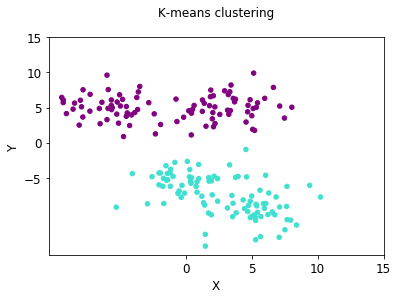

In [7]:
colors = ['turquoise', 'purple']
f = lambda x: colors[int(x)]
cluster_assignments = list(map(f, cluster_assignments))

my_dpi = 96
plt.figure()

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('K-means clustering\n', fontsize=12)

plt.scatter(data[:,0], data[:,1], color=cluster_assignments, s=20)

plt.xticks(np.arange(0, 20, 5), fontsize=12)
plt.yticks(np.arange(-5, 20, 5), fontsize=12)

plt.show()

Как видно из графика, такая стратегия инициализации работает достаточно хорошо. Попробуем увеличить число кластеров.

In [11]:
K = 3
k_means_result = k_means(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

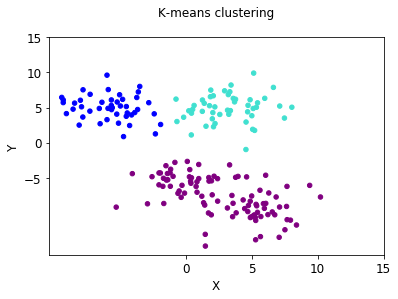

In [12]:
colors = ['turquoise', 'purple', 'blue']
f = lambda x: colors[int(x)]
cluster_assignments = list(map(f, cluster_assignments))

my_dpi = 96
plt.figure()

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('K-means clustering\n', fontsize=12)

plt.scatter(data[:,0], data[:,1], color=cluster_assignments, s=20)

plt.xticks(np.arange(0, 20, 5), fontsize=12)
plt.yticks(np.arange(-5, 20, 5), fontsize=12)

plt.show()

При такой начальной инициализации результат также выглядит достаточно правдоподобным. С другой стороны, возможна также такая ситуация:

In [15]:
K = 3
k_means_result = k_means(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

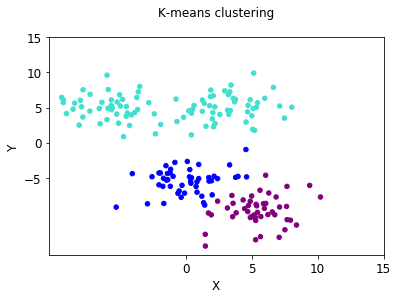

In [16]:
colors = ['turquoise', 'purple', 'blue']
f = lambda x: colors[int(x)]
cluster_assignments = list(map(f, cluster_assignments))

my_dpi = 96
plt.figure()

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('K-means clustering\n', fontsize=12)

plt.scatter(data[:,0], data[:,1], color=cluster_assignments, s=20)

plt.xticks(np.arange(0, 20, 5), fontsize=12)
plt.yticks(np.arange(-5, 20, 5), fontsize=12)

plt.show()

Получается, случайная инициализация центров кластеров недостаточно надежна. Попробуем подобрать алгоритм, работающий стабильнее.

## Различные подходы к начальной инициализации:

В отличие от первого подхода, можно сначала случайным образом задать для каждой точки кластер, к которому она относится, а потом найти центры кластеров как покомпонентное среднее всех точек, относящихся к кластеру. Однако данный подход также не показывает удовлетворительных результатов.

Возможен еще один способ: выбирать для начальной инициализации достаточно далекие точки. Однако это не решит проблемы, ведь точки в одном кластере могут быть как далекими, так и близкими относительно других кластеров. Плюс при увеличении числа векторов значительно вырастает сложность алгоритма.

В результате приходим к выводу, что случайная инициализация выглядит самой разумной и подходящей. В идеале, каждый раз необходимо проводить исследование объекта, к которому применяется k-means. В таком случае можно добиться более высокой точности.

## Для каких задач подходит k-means?

Данный алгоритм обладает сравнительно высокой эффективностью при достаточной простоте реализации. Однако, как мы уже заметили выше, он крайне чувствителен к начальной инициализации, а так же к случайным выбросам и шумам. K-means старается минимизировать среднеквадратичное отклонение на точках каждого кластера, используя евклидову метрику. Думаю, при использовании других метрик результат может поменяться. K-means формирует кластеры центрически. Из этого можно понять к каким задачам он лучше подходит.

Во время проведения исследования мне встретилась статья, в которой говорилось, что k-means часто используется при кластеризации изобржений и видео ввиду его простоты и быстрой скорости работы. Перед его применением, однако, необходимо очистить изобрадения от шума, пропустив их через определенные фильтры.

Существуют наборы данных, на которых он неприменим. Рассмотрим, например, такой вариант:

In [29]:
data = []
with open("data.txt") as f:
    for line in f:
        data.append([float(x) for x in line.split()])
data = np.array(data)

In [30]:
K = 4
k_means_result = k_means(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

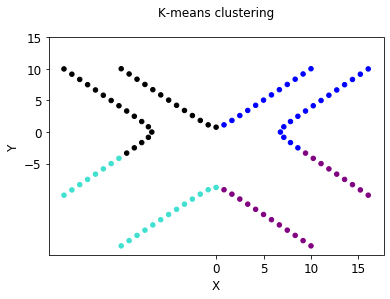

In [31]:
colors = ['turquoise', 'purple', 'blue', 'black']
f = lambda x: colors[int(x)]
cluster_assignments = list(map(f, cluster_assignments))

my_dpi = 96
plt.figure()

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('K-means clustering\n', fontsize=12)

plt.scatter(data[:,0], data[:,1], color=cluster_assignments, s=20)

plt.xticks(np.arange(0, 20, 5), fontsize=12)
plt.yticks(np.arange(-5, 20, 5), fontsize=12)

plt.show()

Как мы видим из графика, подобное разбиение на кластеры соверщенно не соответствует действительности. 

Приведу еще один пример:

In [26]:
data = []
with open("data2.txt") as f:
    for line in f:
        data.append([float(x) for x in line.split()])
data = np.array(data)

In [27]:
K = 4
k_means_result = k_means(data, K)
centroids = k_means_result[0]
cluster_assignments = (k_means_result[1]).tolist()

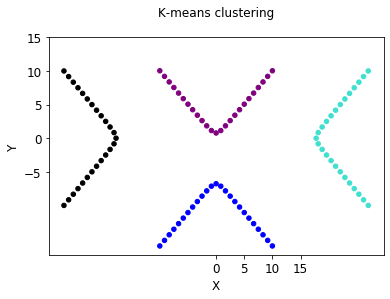

In [28]:
colors = ['turquoise', 'purple', 'blue', 'black']
f = lambda x: colors[int(x)]
cluster_assignments = list(map(f, cluster_assignments))

my_dpi = 96
plt.figure()

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('K-means clustering\n', fontsize=12)

plt.scatter(data[:,0], data[:,1], color=cluster_assignments, s=20)

plt.xticks(np.arange(0, 20, 5), fontsize=12)
plt.yticks(np.arange(-5, 20, 5), fontsize=12)

plt.show()

А здесь алгоритм уже сработал верно. Получается, правильность его работы предсказать достаточно сложно. К тому же, в этих примерах нам было заранее известно число кластеров, на которые необходимо разбить данные, и потому качество кластеризации все-таки достаточно высоко. А как же следует действовать в том случае, когда число кластеров заранее неизвестно? Попробуем предложить алгоритм автоматического выбора числа кластеров.

## Стратегия выбора числа кластеров.

Наиболее удачным вариантом применения алгоритма k-means является ситуация, при которой нам заранее известно число кластеров, либо их количество можно рассчитать на основе анализа объекта, к которому применяется кластеризация. Например, если необходимо "распределить" игроков, забивших голы во время последнего матча, мы можем предположить, что количество образованных в результате кластеров будет равно трем, так как им будут соответсвовать следующие позиции игроков на поле — защитники, центральные защитники и нападающие. Такой подход вполне может быть применим в спортивной аналитике.

Однако чаще всего приходится сталкиваться с более общими задачами. В этом случае сделать такое очевидное предположение о наборе выходных данных невозможно. Рассмотрим второй способ. 

## Сложность алгоритма:
$O(l^{nk+1})$, где $n$ – размерность пространств, $k$ – количество кластеров и $l$ – количество объектов.